### Loading Libraries for Exploitary Data Analysis

In [1]:
import sys
import numpy as np
import pandas as pd
from ipywidgets import widgets
import pandas_profiling
from pandas_profiling import ProfileReport
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data loading and preprocessing

I have converted the 'nan and '?' to numpy 'NaN' and merged date and time to dt which is the index of the dataset

In [2]:
df = pd.read_csv('./household_power_consumption.txt', sep = ';',
                parse_dates = {'dt' : ['Date', 'Time']}, infer_datetime_format = True,
                low_memory = False, na_values = ['nan', '?'], index_col = 'dt')

### Data Insights

In [3]:
# Shape of the data
df.shape

(2075259, 7)

In [4]:
# Checking the Columns
df.columns.values

array(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'], dtype=object)

In [5]:
# Checking the sample data
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [7]:
# Checking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


### Summary Statistics

In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


## Data Visualization and Cleaning

### Initial Data Profile without Data Cleaning

In [9]:
profile = ProfileReport(
    df, title = "Initial Household Power Consumption Report(without data cleaning)",
 html = {"style": {"full_width": True}}, sort=None, minimal=True
)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### Data Cleaning for NaN values

In [10]:
# Finding the columns with 'NaN' values
dropping_list = []
for data in range(0, 7):
    if not df.iloc[:, data].notnull().all():
        dropping_list.append(data)
dropping_list

[0, 1, 2, 3, 4, 5, 6]

In [11]:
# Counting 'NaN' values per column
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [12]:
# Replacing 'NaN' with the mean of the particular column
for data in range(0, 7):
    df.iloc[:, data] = df.iloc[:, data].fillna(df.iloc[:, data].mean())

In [13]:
# Check after replace
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [14]:
# Now checking the Summary Statistics
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### Check Correlation and Covarience among features

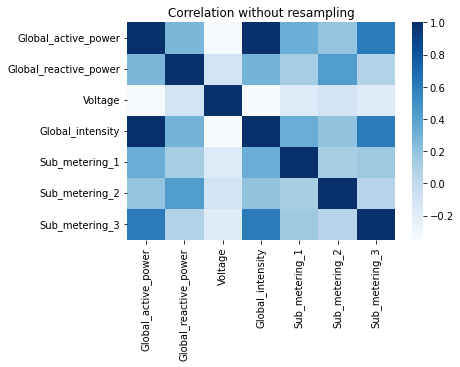

In [15]:
# Correlation without annotations and resampling
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(method='spearman'),cmap='Blues',annot=False)
plt.title('Correlation without resampling')
plt.show()

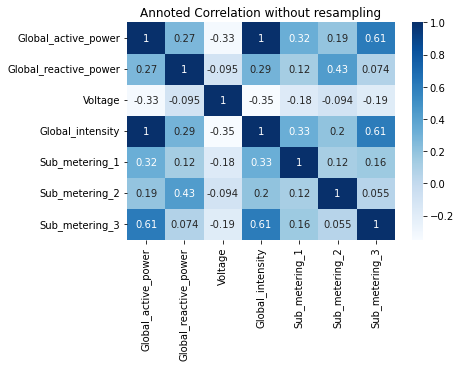

In [16]:
# Correlation without resampling but with annotations
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(method='spearman'),cmap='Blues',annot=True)
plt.title('Annoted Correlation without resampling')
plt.show()

In [ ]:
# Resampled annoted correlation of mean of features over Month
plt.figure(figsize=(6,4))
sns.heatmap(df.resample('M').mean().corr(method='spearman'),cmap='Blues',annot=True)
plt.title('Annoted Correlation resampled over Month')
plt.show()

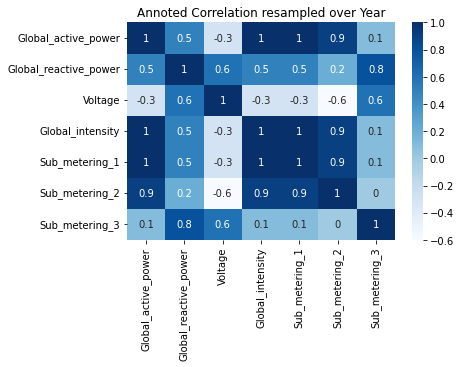

In [17]:
# Resampled annoted correlation of mean of features over Year
plt.figure(figsize=(6,4))
sns.heatmap(df.resample('A').mean().corr(method='spearman'),cmap='Blues',annot=True)
plt.title('Annoted Correlation resampled over Year')
plt.show()

### Covarience of the sampled data

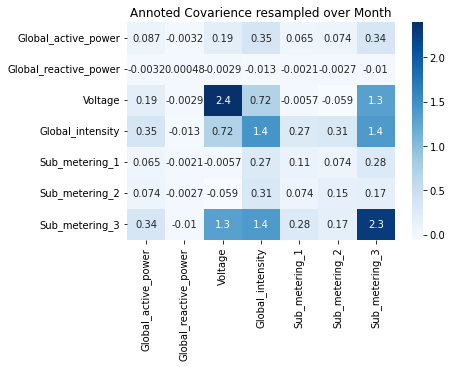

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(df.resample('M').mean().cov(),cmap='Blues',annot=True)
plt.title('Annoted Covarience resampled over Month')
plt.show()

### Data Profile after Data Cleaning

In [19]:
profile = ProfileReport(
    df, title = "Final Household Power Consumption Report",
 html = {"style": {"full_width": True}}, sort=None, minimal=True
)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Time Series Data Visualization

### Showing the sum and mean of Global_active_power on resampled data over hour, day and week

###### Sum and mean resampled over hour

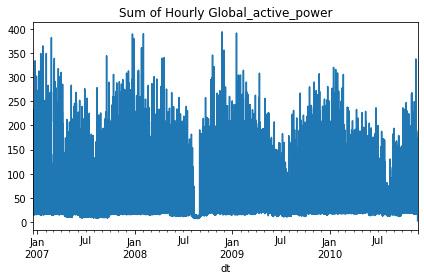

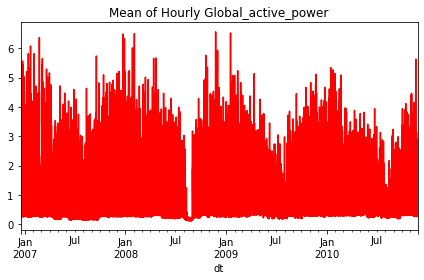

In [20]:
df.Global_active_power.resample('H').sum().plot(title='Sum of Hourly Global_active_power') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('H').mean().plot(title='Mean of Hourly Global_active_power', color='red') 
plt.tight_layout()
plt.show()

###### Sum and mean resampled over day

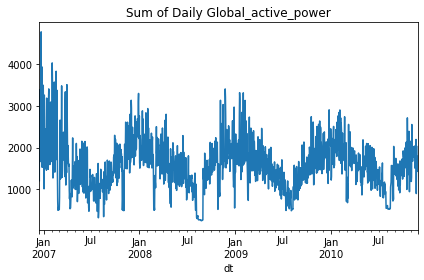

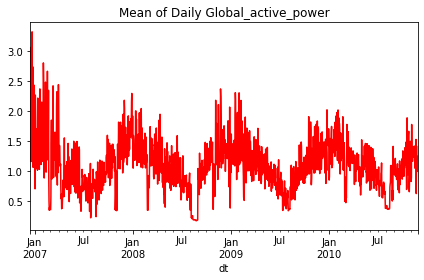

In [21]:
df.Global_active_power.resample('D').sum().plot(title='Sum of Daily Global_active_power') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Mean of Daily Global_active_power', color='red') 
plt.tight_layout()
plt.show()

###### Sum and mean resampled over week

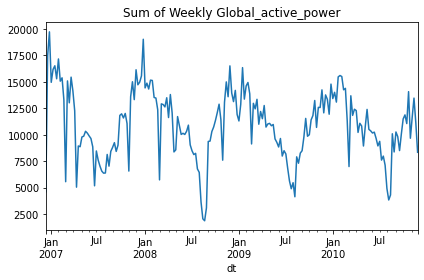

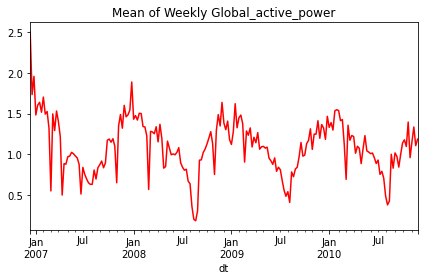

In [22]:
df.Global_active_power.resample('W').sum().plot(title='Sum of Weekly Global_active_power') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('W').mean().plot(title='Mean of Weekly Global_active_power', color='red') 
plt.tight_layout()
plt.show()

#### Mean and standard deviation of Global_reactive_power resampled over hour, day, and week

###### Hourly Mean and std resampled

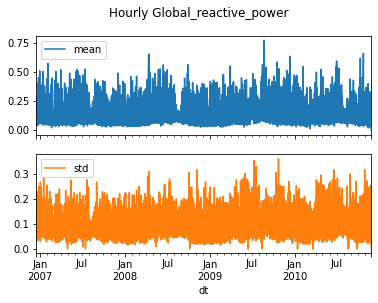

In [23]:
reactive_hour = df.Global_reactive_power.resample('H').agg(['mean', 'std'])
reactive_hour.plot(subplots = True, title='Hourly Global_reactive_power')
plt.show()

###### Daily Mean and std resampled

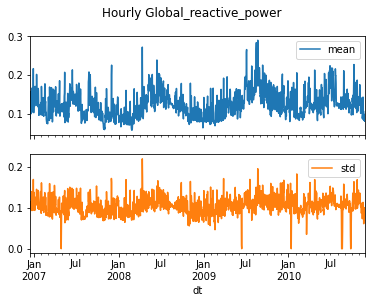

In [24]:
reactive_hour = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
reactive_hour.plot(subplots = True, title='Hourly Global_reactive_power')
plt.show()

###### Weekly Mean and std resampled

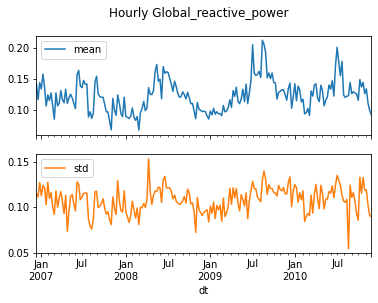

In [25]:
reactive_hour = df.Global_reactive_power.resample('W').agg(['mean', 'std'])
reactive_hour.plot(subplots = True, title='Hourly Global_reactive_power')
plt.show()

### We can do the similar analysis on all the features present in the dataset. I am escaping these analysis and will continue with some monthly and quarterly analysis on the features

#### Monthly and Quarterly Mean of Voltage resampled 

###### Monthly mean of voltage

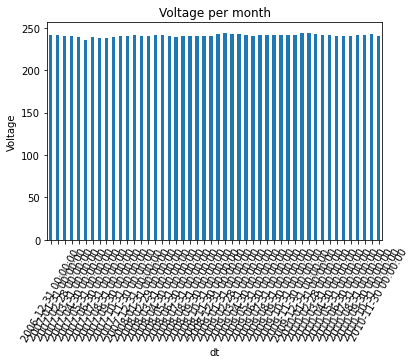

In [26]:
df['Voltage'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per month')
plt.show()

###### Quarterly mean of voltage

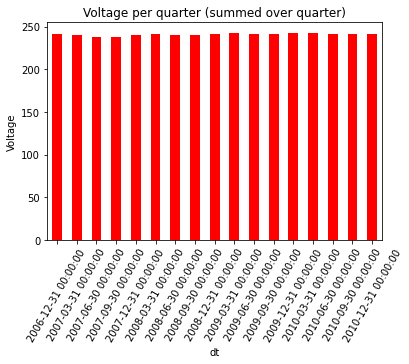

In [27]:
df['Voltage'].resample('Q').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

#### Comparing the weekly standard deviation of different features

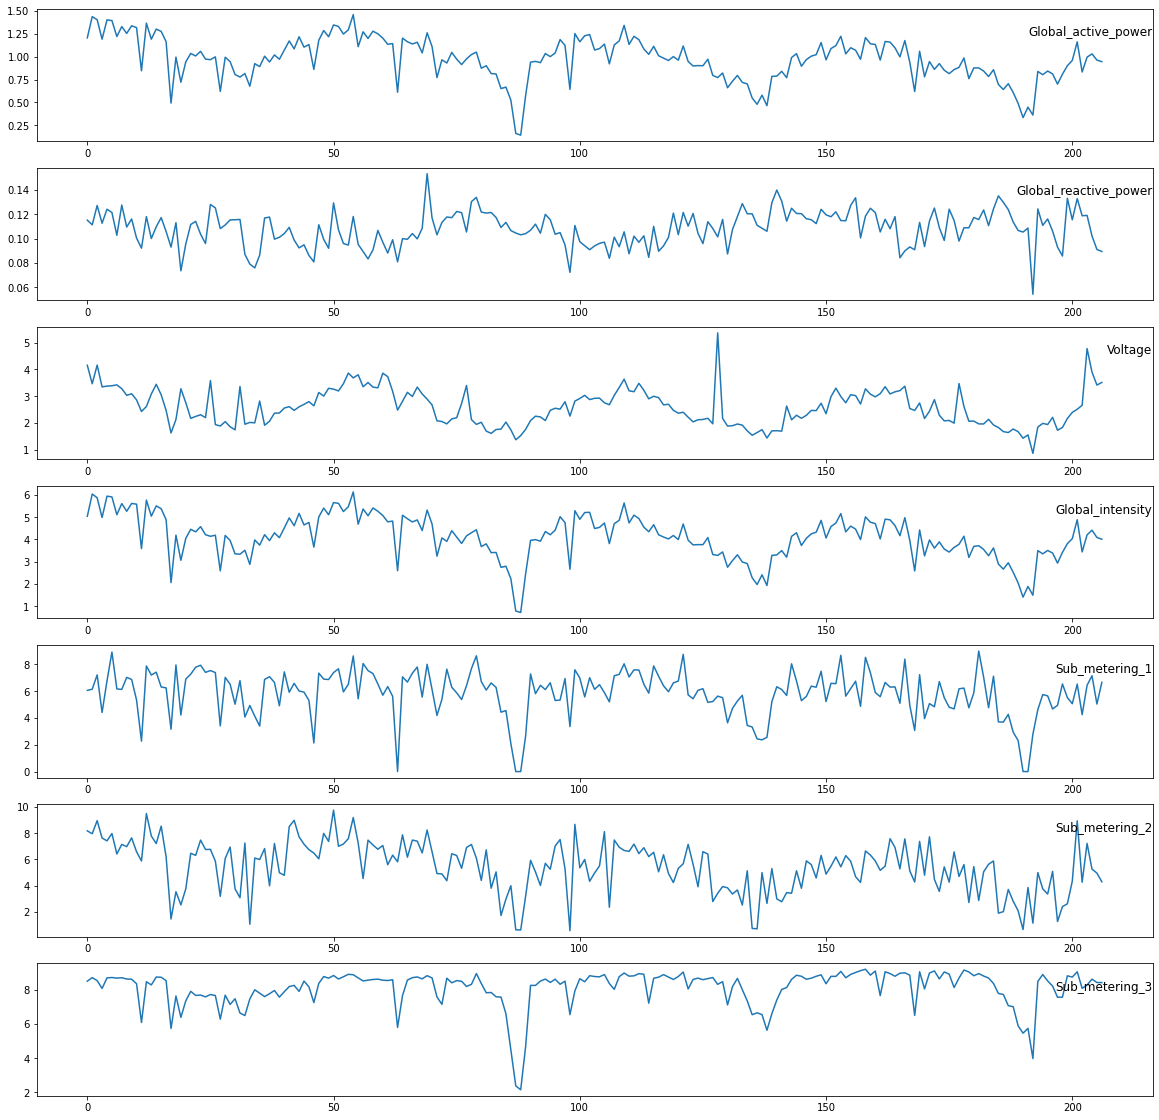

In [28]:
# column specification
cols = [0, 1, 2, 3, 4, 5, 6]
i = 1
values = df.resample('W').std().values
# plot each column
plt.figure(figsize=(20, 20))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, col])
    plt.title(df.columns[col], y=0.75, loc='right')
    i += 1
plt.show()

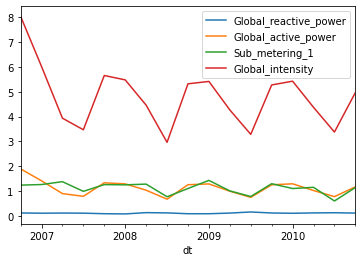

In [29]:
# Quarterly comparison of the mean of different features 
df.Global_reactive_power.resample('Q').mean().plot(legend=True)
df.Global_active_power.resample('Q').mean().plot(legend=True)
df.Sub_metering_1.resample('Q').mean().plot(legend=True)
df.Global_intensity.resample('Q').mean().plot(legend=True)
plt.show()

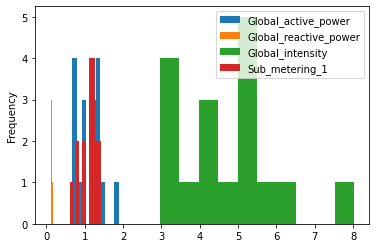

In [30]:
# Quarterly comparison of the mean of different features using histogram

df.Global_active_power.resample('Q').mean().plot(kind='hist', legend=True )
df.Global_reactive_power.resample('Q').mean().plot(kind='hist', legend=True)
df.Global_intensity.resample('Q').mean().plot(kind='hist', legend=True)
df.Sub_metering_1.resample('Q').mean().plot(kind='hist', legend=True)
plt.show()

### Pairwise Correlation

#### Correlation between "Global_intensity" and "Global_active_power"

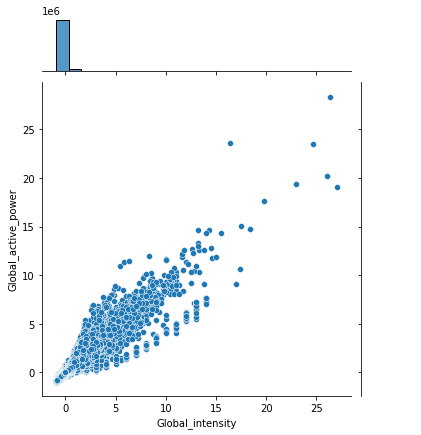

In [31]:
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

#### Correlation between "Voltage" and "Global_active_power"

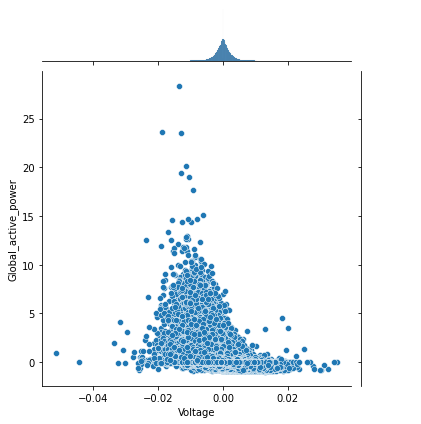

In [32]:
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

#### Overall Monthly Correlationn of the std of the features

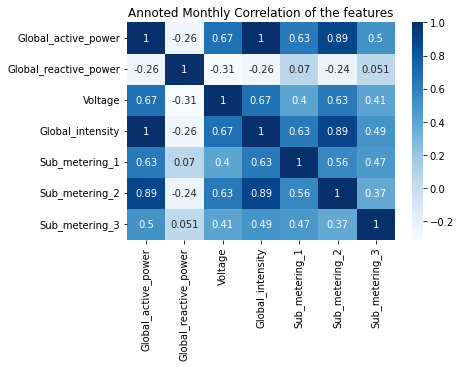

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(df.resample('M').std().corr(method = 'spearman'),cmap='Blues',annot=True)
plt.title('Annoted Monthly Correlation of the features')
plt.show()


# Machine Learning Model Implementation

In [34]:
# Import Libraries for Model implementation
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

###### Supervised learning problem using LSTM to predict Global_active_power at current time given the Global_active_power and other features at the prior time stamp

In [35]:
# Import libraries from keras for LSTM
import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [36]:
# Predicting the Global Active Power at the current time
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [37]:
# Resampling the data over Hour to reduce the computation time
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [38]:
# Rescaling the features in range[0, 1]
values = df_resample.values 

## To use full data:
#values = df.values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


In [39]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24*3
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(26280, 1, 7) (26280,) (8308, 1, 7) (8308,)


### Model Architecture
-> LSTM with 100 Neurons at first visible layer
-> 1 neuron in the output layer
-> Dropout: 20%, epoch: 25, batch_size:70
-> Loss function: Mean Absolute Error, SGD: Adam

2021-12-03 23:51:25.413978: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
263/263 - 2s - loss: 0.0133 - val_loss: 0.0077 - 2s/epoch - 7ms/step
Epoch 2/50
263/263 - 0s - loss: 0.0098 - val_loss: 0.0075 - 388ms/epoch - 1ms/step
Epoch 3/50
263/263 - 0s - loss: 0.0096 - val_loss: 0.0075 - 391ms/epoch - 1ms/step
Epoch 4/50
263/263 - 0s - loss: 0.0096 - val_loss: 0.0074 - 416ms/epoch - 2ms/step
Epoch 5/50
263/263 - 0s - loss: 0.0095 - val_loss: 0.0076 - 395ms/epoch - 2ms/step
Epoch 6/50
263/263 - 0s - loss: 0.0095 - val_loss: 0.0075 - 390ms/epoch - 1ms/step
Epoch 7/50
263/263 - 0s - loss: 0.0094 - val_loss: 0.0075 - 408ms/epoch - 2ms/step
Epoch 8/50
263/263 - 0s - loss: 0.0094 - val_loss: 0.0075 - 415ms/epoch - 2ms/step
Epoch 9/50
263/263 - 0s - loss: 0.0094 - val_loss: 0.0076 - 430ms/epoch - 2ms/step
Epoch 10/50
263/263 - 1s - loss: 0.0094 - val_loss: 0.0074 - 600ms/epoch - 2ms/step
Epoch 11/50
263/263 - 1s - loss: 0.0094 - val_loss: 0.0074 - 595ms/epoch - 2ms/step
Epoch 12/50
263/263 - 0s - loss: 0.0094 - val_loss: 0.0075 - 399ms/epoch - 2ms/step
Epoc

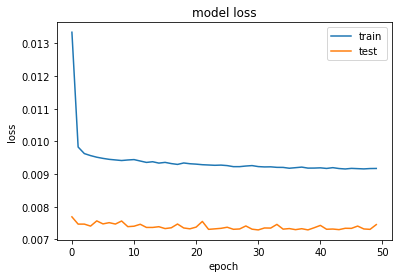

Test RMSE: 0.556


In [40]:
# Model Building
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=100, 
                    validation_data=(test_X, test_y), verbose=2, shuffle=True)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)